<a href="https://colab.research.google.com/github/taniokah/Sports_Analysis/blob/master/OpenCV_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCVテスト

In [1]:
%matplotlib inline
import cv2 #　opencvのインポート
import matplotlib.pyplot as plt # matplotlib(描画用)

print(cv2.__version__)

3.4.3


In [2]:
!pip install pytube
!pip install ffmpeg

  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg


In [3]:
from pytube import YouTube

#yt = YouTube("https://www.youtube.com/watch?v=ZvFNaUWLj9Y")
yt = YouTube("https://youtu.be/l00CwQ6HI_o")
yt.streams.first().download()

'/content/20190224 鹿屋体育大学 vs 鹿児島高専 1st.mp4'

In [0]:
!rm -rf screen_caps
!mkdir screen_caps

In [5]:
#動画ファイルを読み込む
#file_name = u"20190217 徳島大学医学部 vs 吉野クラブ 2nd No2.mp4"
file_name = u"20190224 鹿屋体育大学 vs 鹿児島高専 1st.mp4"
video = cv2.VideoCapture(file_name)

#フレームレート数の取得
frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
print('frame_count = ' + str(frame_count))

#フレームレート(1フレームの時間単位はミリ秒)の取得
frame_rate = int(video.get(cv2.CAP_PROP_FPS))
print('frame_rate = ' + str(frame_rate))

# 画像を保存する
dir_name = "screen_caps"
for i in range(frame_count):
  _, frame = video.read()
  if i % 330 == 0: # 10秒で1枚
    file_name = dir_name+ "/" + str(i) + ".png"
    cv2.imwrite(file_name, frame)


frame_count = 89369
frame_rate = 29


In [6]:
!pip install natsort

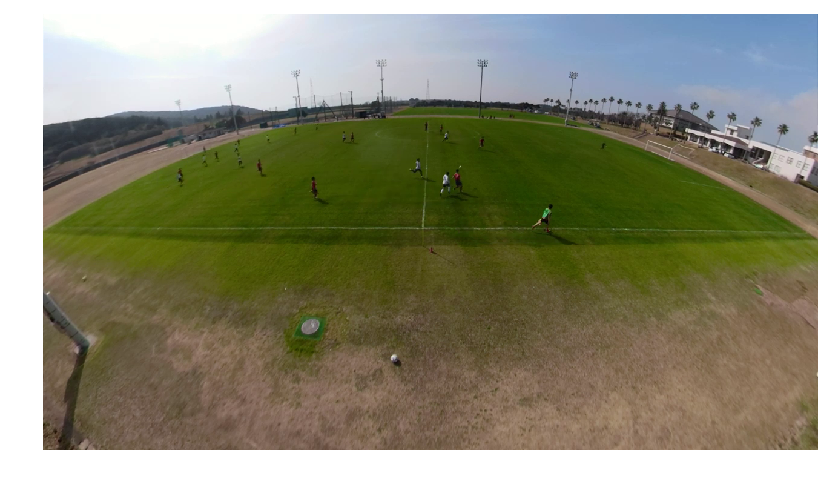

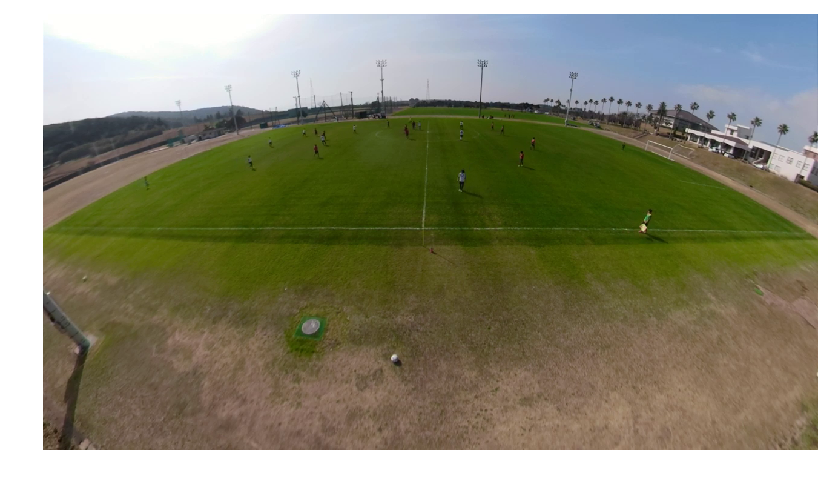

In [7]:
import os
import glob
from natsort import natsorted

%matplotlib inline
import matplotlib.pyplot as plt # matplotlib(描画用)

dir_name = "screen_caps"
files = glob.glob(dir_name + "/*")
files = natsorted(files)

# 先頭から100枚を表示
#for i in range(frame_count):
height = 2
for i in range(height):
  #file_name = dir_name+ "/" + str(i) + ".png"
  file_name = files[i + 100]
  img = cv2.imread(file_name)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(10, 10), dpi=100)
  #plt.subplot(height, 1, i + 1)
  plt.axis('off')
  plt.imshow(img) #表示


In [0]:
!rm -rf masked_caps
!mkdir masked_caps

In [0]:
import cv2

import os
import glob
from natsort import natsorted

def mask(file_name):

  img_BGR = cv2.imread(file_name)

  # L*a*b*
  img_Lab = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2Lab)
  img_Lab_L, img_Lab_a, img_Lab_b = cv2.split(img_Lab)
  # cv2.imwrite('chirsuta.a.jpg', img_Lab_L)

  # detect green area with a* value
  _thres, img_green = cv2.threshold(img_Lab_a, 120, 255, cv2.THRESH_BINARY_INV)

  # get masked BGR images
  img_green_masked = cv2.bitwise_and(img_BGR, img_BGR, mask=img_green)
  # cv2.imwrite('chirsuta.mask.jpg', img_green)

  dir_name = "masked_caps"
  file = os.path.basename(file_name)
  name, _ = os.path.splitext(file)
  cv2.imwrite(dir_name + '/' + name + '.png', img_green_masked)

dir_name = "screen_caps"
files = glob.glob(dir_name + "/*")
files = natsorted(files)

#for i in range(frame_count):
for i in files:
  #file_name = dir_name+ "/" + str(i) + ".png"
  #print(i)  
  mask(i)


In [22]:
!zip -r screen_caps.zip screen_caps

updating: screen_caps/ (stored 0%)
updating: screen_caps/13200.png (deflated 10%)
updating: screen_caps/29370.png (deflated 8%)
updating: screen_caps/70620.png (deflated 9%)
updating: screen_caps/60390.png (deflated 10%)
updating: screen_caps/41910.png (deflated 9%)
updating: screen_caps/79200.png (deflated 10%)
updating: screen_caps/70950.png (deflated 9%)
updating: screen_caps/70290.png (deflated 9%)
updating: screen_caps/4620.png (deflated 10%)
updating: screen_caps/23760.png (deflated 10%)
updating: screen_caps/18810.png (deflated 10%)
updating: screen_caps/30690.png (deflated 7%)
updating: screen_caps/75570.png (deflated 9%)
updating: screen_caps/9240.png (deflated 10%)
updating: screen_caps/47520.png (deflated 10%)
updating: screen_caps/53460.png (deflated 10%)
updating: screen_caps/62700.png (deflated 9%)
updating: screen_caps/86460.png (deflated 9%)
updating: screen_caps/49170.png (deflated 9%)
updating: screen_caps/2640.png (deflated 10%)
updating: screen_caps/18150.png (defla

In [23]:
!zip -r masked_caps masked_caps

  adding: masked_caps/ (stored 0%)
  adding: masked_caps/13200.png (deflated 7%)
  adding: masked_caps/29370.png (deflated 7%)
  adding: masked_caps/70620.png (deflated 7%)
  adding: masked_caps/60390.png (deflated 7%)
  adding: masked_caps/41910.png (deflated 6%)
  adding: masked_caps/79200.png (deflated 8%)
  adding: masked_caps/70950.png (deflated 7%)
  adding: masked_caps/70290.png (deflated 7%)
  adding: masked_caps/4620.png (deflated 7%)
  adding: masked_caps/23760.png (deflated 8%)
  adding: masked_caps/18810.png (deflated 8%)
  adding: masked_caps/30690.png (deflated 6%)
  adding: masked_caps/75570.png (deflated 7%)
  adding: masked_caps/9240.png (deflated 7%)
  adding: masked_caps/47520.png (deflated 8%)
  adding: masked_caps/53460.png (deflated 7%)
  adding: masked_caps/62700.png (deflated 7%)
  adding: masked_caps/86460.png (deflated 7%)
  adding: masked_caps/49170.png (deflated 7%)
  adding: masked_caps/2640.png (deflated 8%)
  adding: masked_caps/18150.png (deflated 8%)
  